In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("car_evaluation.csv", names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [7]:
for col in df.columns:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


Feature/Target

In [8]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [9]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [10]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [11]:
y.tail()

1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, dtype: object

Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape

(1209, 6)

In [15]:
X_test.shape

(519, 6)

Encoding

In [16]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


Model Selection

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [20]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
pred_train = dtc.predict(X_train)
pred_test = dtc.predict(X_test)

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file="car_evl.dot", feature_names=X.columns, class_names=y.unique())

Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [24]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

acs_train = accuracy_score(y_train, pred_train)
acs_test = accuracy_score(y_test, pred_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

In [25]:
print("Train Confusion Matrix: ", cm_train)
print("Test Confusion Matrix: ", cm_test)
print("\n")
print("acs_train: ", acs_train)
print("acs_test: ", acs_test)
print("\n")
print("report_train: ", report_train)
print("report_test ", report_test)

Train Confusion Matrix:  [[114   0 152   0]
 [ 21   0  29   0]
 [ 27   0 825   0]
 [ 41   0   0   0]]
Test Confusion Matrix:  [[ 44   0  74   0]
 [  9   0  10   0]
 [  8   0 350   0]
 [ 24   0   0   0]]


acs_train:  0.7766749379652605
acs_test:  0.7591522157996147


report_train:                precision    recall  f1-score   support

         acc       0.56      0.43      0.49       266
        good       0.00      0.00      0.00        50
       unacc       0.82      0.97      0.89       852
       vgood       0.00      0.00      0.00        41

    accuracy                           0.78      1209
   macro avg       0.35      0.35      0.34      1209
weighted avg       0.70      0.78      0.73      1209

report_test                precision    recall  f1-score   support

         acc       0.52      0.37      0.43       118
        good       0.00      0.00      0.00        19
       unacc       0.81      0.98      0.88       358
       vgood       0.00      0.00      0.00        2

[Text(0.625, 0.875, 'persons <= 2.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.5, 0.625, 'safety <= 1.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'buying <= 3.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(0.125, 0.125, 'gini = 0.615\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(0.375, 0.125, 'gini = 0.498\nsamples = 70\nvalue = [33, 0, 37, 0]'),
 Text(0.75, 0.375, 'safety <= 2.5\ngini = 0.42\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 274\nvalue = [0, 0, 274, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 269\nvalue = [119, 29, 121, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]'),
 Text(0.6875, 0.75, '  False')]

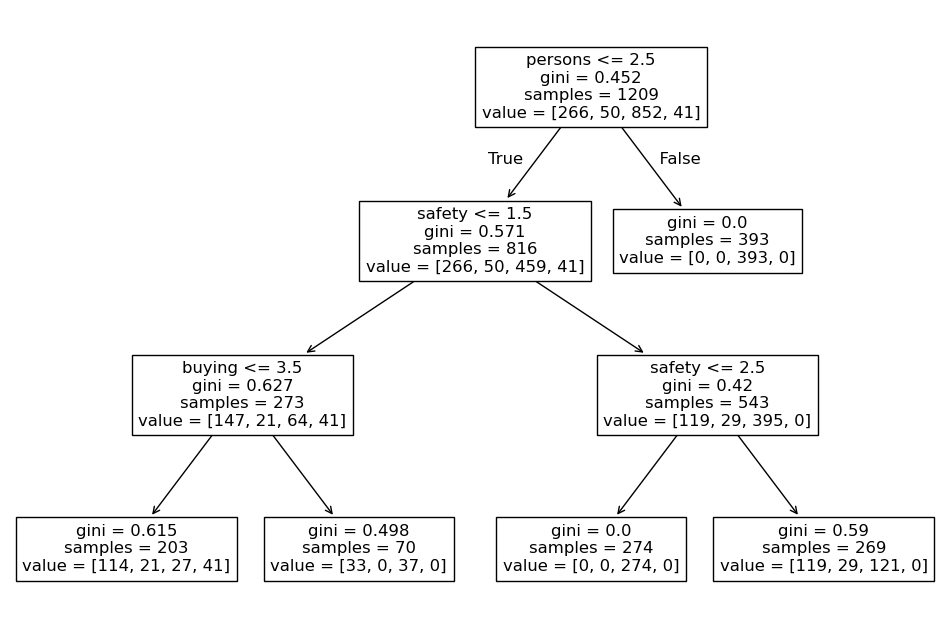

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(dtc.fit(X_train, y_train), feature_names=(X.columns))

Hyperparameter Tuning

In [28]:
param= {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3,4,5,15,None],
    "max_features": ["sqrt", "log2", None]
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=param, cv=5, scoring="accuracy")

In [31]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [32]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'splitter': 'best'}

In [33]:
pred_train = grid.predict(X_train)
pred_test = grid.predict(X_test)

In [34]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

acs_train = accuracy_score(y_train, pred_train)
acs_test = accuracy_score(y_test, pred_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

In [35]:
print("Train Confusion Matrix: ", cm_train)
print("Test Confusion Matrix: ", cm_test)
print("\n")
print("acs_train: ", acs_train)
print("acs_test: ", acs_test)
print("\n")
print("report_train: ", report_train)
print("report_test ", report_test)

Train Confusion Matrix:  [[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]
Test Confusion Matrix:  [[ 98   5  12   3]
 [  1  16   0   2]
 [  7   0 351   0]
 [  3   2   0  19]]


acs_train:  1.0
acs_test:  0.9325626204238922


report_train:                precision    recall  f1-score   support

         acc       1.00      1.00      1.00       266
        good       1.00      1.00      1.00        50
       unacc       1.00      1.00      1.00       852
       vgood       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

report_test                precision    recall  f1-score   support

         acc       0.90      0.83      0.86       118
        good       0.70      0.84      0.76        19
       unacc       0.97      0.98      0.97       358
       vgood       0.79      0.79      0.79        24

    accuracy

In [37]:
dtc_new = DecisionTreeClassifier(criterion="gini", max_depth=None, max_features=None, splitter="best")

In [38]:
dtc_new.fit(X_train, y_train)
pred_train = dtc_new.predict(X_train)
pred_test = dtc_new.predict(X_test)

In [39]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

acs_train = accuracy_score(y_train, pred_train)
acs_test = accuracy_score(y_test, pred_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print("Train Confusion Matrix: ", cm_train)
print("Test Confusion Matrix: ", cm_test)
print("\n")
print("acs_train: ", acs_train)
print("acs_test: ", acs_test)
print("\n")
print("report_train: ", report_train)
print("report_test ", report_test)

Train Confusion Matrix:  [[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]
Test Confusion Matrix:  [[ 94   6  11   7]
 [  1  16   1   1]
 [  7   0 351   0]
 [  3   4   0  17]]


acs_train:  1.0
acs_test:  0.9210019267822736


report_train:                precision    recall  f1-score   support

         acc       1.00      1.00      1.00       266
        good       1.00      1.00      1.00        50
       unacc       1.00      1.00      1.00       852
       vgood       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

report_test                precision    recall  f1-score   support

         acc       0.90      0.80      0.84       118
        good       0.62      0.84      0.71        19
       unacc       0.97      0.98      0.97       358
       vgood       0.68      0.71      0.69        24

    accuracy

[Text(0.538375, 0.9666666666666667, 'persons <= 2.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.530375, 0.9, 'safety <= 1.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(0.534375, 0.9333333333333333, 'True  '),
 Text(0.29275, 0.8333333333333334, 'buying <= 3.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(0.2095, 0.7666666666666667, 'buying <= 2.5\ngini = 0.615\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(0.115, 0.7, 'maint <= 2.5\ngini = 0.528\nsamples = 134\nvalue = [87, 6, 24, 17]'),
 Text(0.06, 0.6333333333333333, 'buying <= 1.5\ngini = 0.316\nsamples = 65\nvalue = [53, 0, 4, 8]'),
 Text(0.032, 0.5666666666666667, 'maint <= 1.5\ngini = 0.48\nsamples = 30\nvalue = [20, 0, 2, 8]'),
 Text(0.016, 0.5, 'persons <= 1.5\ngini = 0.486\nsamples = 12\nvalue = [3, 0, 1, 8]'),
 Text(0.008, 0.43333333333333335, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5]'),
 Text(0.024, 0.43333333333333335, 'lug_boot <= 2.5\ngini = 0.612\n

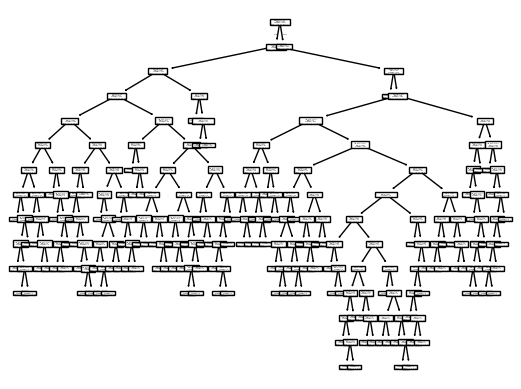

In [40]:
tree.plot_tree(dtc_new.fit(X_train, y_train), feature_names=(X.columns))